In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read the dataset

In [2]:
orders = pd.read_csv('/content/drive/MyDrive/Project/Accenture Supply Chain/Dataset/orders.txt',sep = ";")
orders.head()

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,late_order
0,366c7a3d298f,Rotterdam,v_002,DTP,Venlo,Marseille,1692723,583,True
1,45f906331e10,Rotterdam,v_004,CRF,Rome,Marseille,1644308,459,False
2,ac84a6e4af0f,Athens,v_002,CRF,Venlo,Paris,1684170,464,True
3,f5e98cb29790,Rotterdam,v_004,CRF,Lille,Milan,1620510,678,False
4,a9e7c9bee35b,Barcelona,v_002,CRF,Venlo,Berlin,1699372,353,False


In [3]:
product_attributes = pd.read_csv('/content/drive/MyDrive/Project/Accenture Supply Chain/Dataset/product_attributes.txt', sep = ",")
product_attributes.head()

,product_id,weight,material_handling
0,1672707,2876,3
1,1694456,2785,5
2,1682865,2751,3
3,1689146,2736,0
4,1664069,2707,4


In [4]:
cities_data = pd.read_csv('/content/drive/MyDrive/Project/Accenture Supply Chain/Dataset/cities_data.txt',sep=";")
cities_data.head()

,city_from_name,city_to_name,city_from_coord,city_to_coord,distance
0,Dusseldorf,Zaragoza,"(51.2254018, 6.7763137)","(41.6521342, -0.8809428)",1214.4772
1,Dusseldorf,Venlo,"(51.2254018, 6.7763137)","(51.39244885, 6.1511724144122955)",47.3876
2,Dusseldorf,Bratislava,"(51.2254018, 6.7763137)","(48.1516988, 17.1093063)",819.2894
3,Dusseldorf,Hamburg,"(51.2254018, 6.7763137)","(53.550341, 10.000654)",339.2215
4,Dusseldorf,Rome,"(51.2254018, 6.7763137)","(41.8933203, 12.4829321)",1125.0290


In [5]:
test = pd.read_csv('/content/drive/MyDrive/Project/Accenture Supply Chain/Dataset/test.txt', sep = ";")
test.head()

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units
0,0e364fa5c795,Rotterdam,v_002,CRF,Warsaw,Munich,1687644,477
1,3ef49bd5a55b,Barcelona,v_002,CRF,Venlo,Berlin,1699689,240
2,9ab5b9685bd5,Rotterdam,v_004,DTD,Bratislava,Paris,1652615,506
3,bfce5b4fc4fa,Rotterdam,v_002,DTD,Rome,Hanover,1669740,553
4,d94453ec8ec5,Barcelona,v_001,CRF,Bratislava,Copenhagen,1695138,482


In [6]:
# Extra dataset 1 for insights.
cities_data_costs = pd.read_csv("/content/drive/MyDrive/Project/Accenture Supply Chain/Dataset/cities_data_costs.txt",sep = ",")
cities_data_costs.head()

,city_from_name,city_to_name,city_from_coord,city_to_coord,distance,weight_class,cost_per_unit,co2_per_unit
0,Dusseldorf,Zaragoza,"(51.2254018, 6.7763137)","(41.6521342, -0.8809428)",1214.4772,0,429.76,819.77
1,Dusseldorf,Zaragoza,"(51.2254018, 6.7763137)","(41.6521342, -0.8809428)",1214.4772,1,472.74,901.75
2,Dusseldorf,Zaragoza,"(51.2254018, 6.7763137)","(41.6521342, -0.8809428)",1214.4772,2,515.71,983.73
3,Dusseldorf,Zaragoza,"(51.2254018, 6.7763137)","(41.6521342, -0.8809428)",1214.4772,3,558.69,1065.70
4,Dusseldorf,Zaragoza,"(51.2254018, 6.7763137)","(41.6521342, -0.8809428)",1214.4772,4,601.66,1147.68


In [7]:
# Extra dataset 2 for in
product_weight_class = pd.read_csv("/content/drive/MyDrive/Project/Accenture Supply Chain/Dataset/product_weight_class.txt",sep = ",")
product_weight_class.head()

,product_id,weight_class
0,1660578,0
1,1699768,0
2,1699799,0
3,1683403,0
4,1682793,0


# Data preprocessing

Description from the order.csv

Categorical variables/Qualitative Variable: 
origin_port, 3pl, customs_procedures, logistic_hub, customer

Quantitative variable: order size quantity

Response variable: late_order
    

Check for missing data

In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114276 entries, 0 to 114275
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   order_id            114276 non-null  object
 1   origin_port         114276 non-null  object
 2   3pl                 114276 non-null  object
 3   customs_procedures  114276 non-null  object
 4   logistic_hub        113227 non-null  object
 5   customer            114276 non-null  object
 6   product_id          114276 non-null  int64 
 7   units               114276 non-null  int64 
 8   late_order          114276 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 7.1+ MB


What are orgin_port present in the order dataset?

In [9]:
orders.iloc[:,1].unique()

array(['Rotterdam', 'Athens', 'Barcelona', 'BCN', 'ATHENAS'], dtype=object)

Rotterdam, Athens, Barcelona, BCN and Athenas are the origin ports of interest. BCN is short form for Barcelona and Athenas is a city in Athens. 
We will rename BCN as Barcelona and ATHENAS to Athens.

In [10]:
# Rename BCN to Barcelona
orders.loc[orders.origin_port == 'BCN', 'origin_port'] = "Barcelona"

# Rename ATHENAS to Athens
orders.loc[orders.origin_port == 'ATHENAS', 'origin_port'] = "Athens"

orders['origin_port'].value_counts()

Rotterdam    65191
Athens       27529
Barcelona    21556
Name: origin_port, dtype: int64

In [ ]:
orders.iloc[:,2].unique()

array(['v_002', 'v_004', 'v_001', 'v_003'], dtype=object)

There are 4 3rd party logistics firms with v_001, v_002, v_003 and v_004.

In [ ]:
orders.iloc[:,3].unique()

array(['DTP', 'CRF', 'DTD'], dtype=object)

3 unique customs procedure

In [ ]:
orders.iloc[:,4].unique()

array(['Venlo', 'Rome', 'Lille', 'Bratislava', 'Warsaw', nan,
       'Dusseldorf', 'Hamburg', 'Liege', 'Zaragoza'], dtype=object)

nan exists in this dataset, indicating missing entries for logisitic_hub. This means that some fulfillment does not require logisitic hub as a transit.

In [ ]:
orders.iloc[:,5].unique()

array(['Marseille', 'Paris', 'Milan', 'Berlin', 'Munich', 'Prague',
       'Rome', 'Madrid', 'Naples', 'Athens', 'Lisbon', 'Turin', 'Vienna',
       'Stockholm', 'Barcelona', 'Amsterdam', 'Valencia', 'Cologne',
       'Malmö', 'Budapest', 'Hanover', 'Helsinki', 'Copenhagen',
       'Bucharest', 'Bremen', 'Lyon', 'Porto', 'Bordeaux'], dtype=object)

## Exploratory Data Analysis

### Categorical Variables

#### What are the proportions of logistic_hub used in Europe?

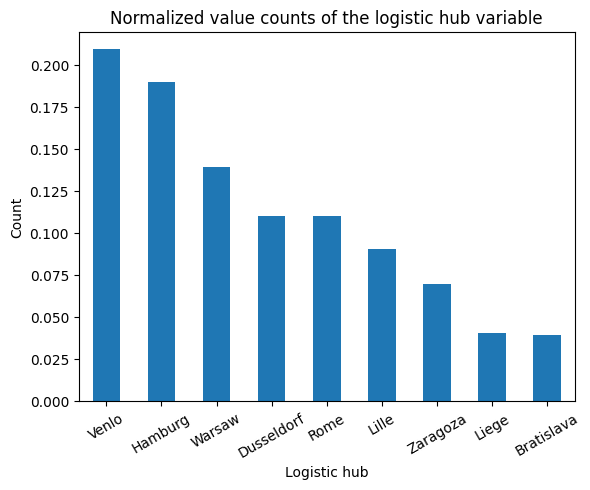

In [ ]:
categorical_orders = ['order_id', 'origin_port', '3pl','customs_procedures'
                     'logistic_hub','customer','late_order']
orders['logistic_hub'].value_counts( normalize=True).plot(kind="bar")
plt.title("Normalized value counts of the logistic hub variable")
plt.xlabel("Logistic hub")
plt.xticks(rotation=30)
plt.ylabel("Count") 
plt.show()


#### What is the incidence of late delivery?

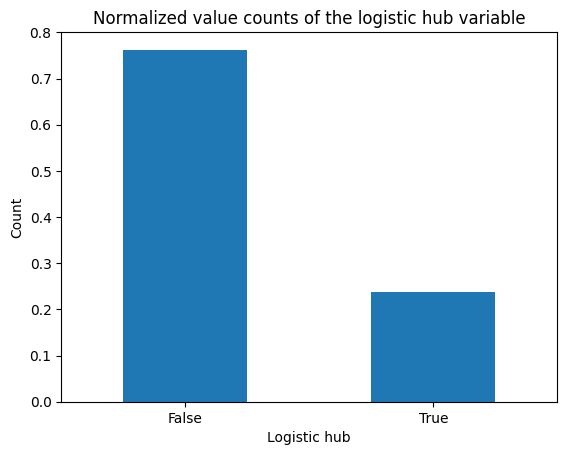

In [ ]:
orders['late_order'].value_counts( normalize=True).plot(kind="bar")
plt.title("Normalized value counts of the logistic hub variable")
plt.xlabel("Logistic hub")
plt.xticks(rotation=0)
plt.ylabel("Count") 
plt.show()

#### Logistics Exploratory Analysis

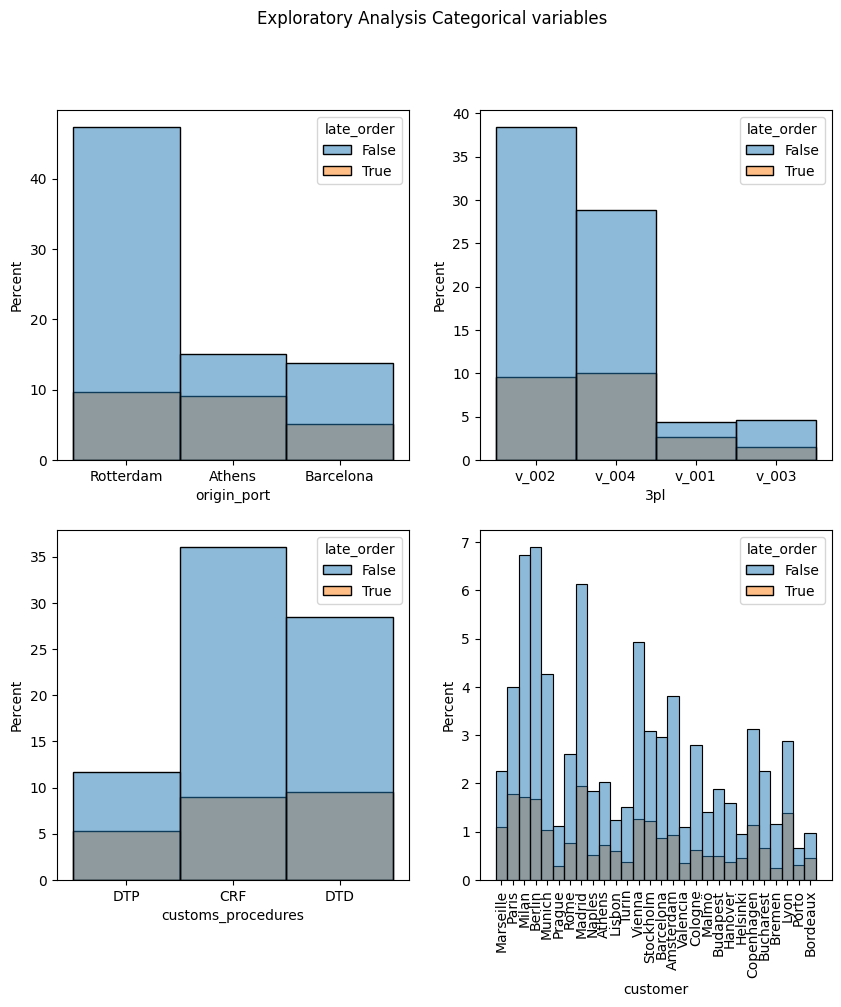

In [ ]:
# Initialise the subplot function using the number of rows and columns
fig, axes = plt.subplots(2,2, figsize=(10, 10))

fig.suptitle("Exploratory Analysis Categorical variables")

sns.histplot(ax = axes[0,0], data = orders, x = 'origin_port', 
             hue= 'late_order', stat = 'percent')
sns.histplot(ax=axes[0,1], data = orders, x = '3pl', 
             hue= 'late_order', stat = 'percent')
sns.histplot(ax=axes[1,0], data = orders, x = 'customs_procedures', 
             hue= 'late_order', stat = 'percent')
k = sns.histplot(ax=axes[1,1], data = orders, x = 'customer', 
             hue= 'late_order', stat = 'percent')

# Rotate the horizontal alighnment to become vertically alignment.
axes[1][1].tick_params(axis='x', rotation=90)


#### Products Exploratory Analysis from product_attributes dataset

In [ ]:
# Check for missing data
product_attributes.isnull().sum()
# There is no missing data.

product_id           0
weight               0
material_handling    0
dtype: int64

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

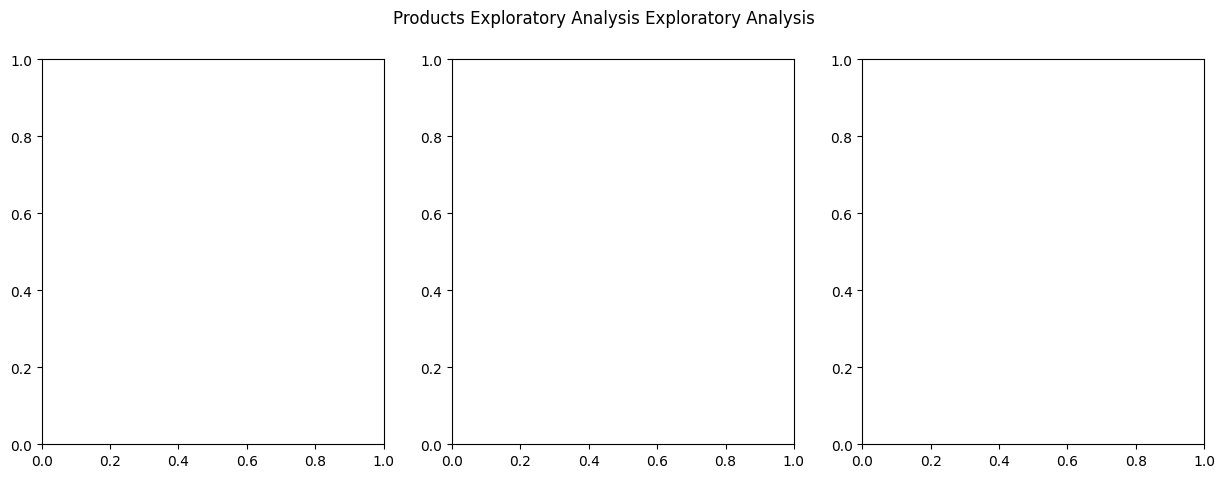

In [ ]:
# Initialise the subplot function using the number of rows and columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Products Exploratory Analysis Exploratory Analysis")

# Product_ID
sns.histplot(ax = axes[0,0], data = orders, x = 'product_id')
# Weight


# Material handling

In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114276 entries, 0 to 114275
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   order_id            114276 non-null  object
 1   origin_port         114276 non-null  object
 2   3pl                 114276 non-null  object
 3   customs_procedures  114276 non-null  object
 4   logistic_hub        113227 non-null  object
 5   customer            114276 non-null  object
 6   product_id          114276 non-null  int64 
 7   units               114276 non-null  int64 
 8   late_order          114276 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 7.1+ MB


In [14]:
product_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   product_id         772 non-null    int64
 1   weight             772 non-null    int64
 2   material_handling  772 non-null    int64
dtypes: int64(3)
memory usage: 18.2 KB


In [15]:
cities_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city_from_name   666 non-null    object 
 1   city_to_name     666 non-null    object 
 2   city_from_coord  666 non-null    object 
 3   city_to_coord    666 non-null    object 
 4   distance         666 non-null    float64
dtypes: float64(1), object(4)
memory usage: 26.1+ KB


Create a dictionary of product_attributes with product_id as key and weight and 
material_handling as value.

In [11]:
product_attributes_dict = {}

# iterate over each row in the dataframe
for index, row in product_attributes.iterrows():
  #print(row)
  if row['product_id'] not in product_attributes_dict:
    product_attributes_dict[row['product_id']] = {}

  product_attributes_dict[row['product_id']]['weight'] = row['weight']
  product_attributes_dict[row['product_id']]['material_handling'] = row['material_handling']
product_attributes_dict

{1672707: {'weight': 2876, 'material_handling': 3},
 1694456: {'weight': 2785, 'material_handling': 5},
 1682865: {'weight': 2751, 'material_handling': 3},
 1689146: {'weight': 2736, 'material_handling': 0},
 1664069: {'weight': 2707, 'material_handling': 4},
 1692656: {'weight': 2611, 'material_handling': 4},
 1700887: {'weight': 2609, 'material_handling': 5},
 1683405: {'weight': 2594, 'material_handling': 3},
 1699172: {'weight': 2543, 'material_handling': 3},
 1672091: {'weight': 2511, 'material_handling': 0},
 1699955: {'weight': 2502, 'material_handling': 5},
 1671951: {'weight': 2483, 'material_handling': 4},
 1668612: {'weight': 2483, 'material_handling': 4},
 1699670: {'weight': 2458, 'material_handling': 0},
 1689032: {'weight': 2426, 'material_handling': 5},
 1699173: {'weight': 2411, 'material_handling': 0},
 1699793: {'weight': 2400, 'material_handling': 2},
 1699337: {'weight': 2386, 'material_handling': 2},
 1699310: {'weight': 2383, 'material_handling': 3},
 1700121: {'

Create the dictionary of coordinates

In [12]:
import ast
# create an empty dictionary to store the data
cities_dict = {}

# iterate over each row in the dataframe
for index, row in cities_data.iterrows():
    # get the city from and city to names
    city_from = row['city_from_name']
    city_to = row['city_to_name']
    
    # check if the city from is already in the dictionary
    if city_from not in cities_dict:
        # if not, add it to the dictionary with an empty dictionary as its value
        cities_dict[city_from] = {}
    if city_to not in cities_dict[city_from]:
      cities_dict[city_from][city_to] = {}
    # add the city to the dictionary with its distance as the value
    from_coord = row['city_from_coord']
    from_coord1_tuple = ast.literal_eval(from_coord)
    #print(from_coord1_tuple)
    from_coord2 = row['city_to_coord']
    #print(from_coord2)
    from_coord2_tuple = ast.literal_eval(from_coord2)
    cities_dict[city_from][city_to]['origin_city_lat'] = from_coord1_tuple[0]
    cities_dict[city_from][city_to]['origin_city_lon'] = from_coord1_tuple[1]
    cities_dict[city_from][city_to]['dest_city_lat'] = from_coord2_tuple[0]
    cities_dict[city_from][city_to]['dest_city_lon'] = from_coord2_tuple[1]
    cities_dict[city_from][city_to]['distance'] = row['distance']

In [13]:
cities_dict

{'Dusseldorf': {'Zaragoza': {'origin_city_lat': 51.2254018,
   'origin_city_lon': 6.7763137,
   'dest_city_lat': 41.6521342,
   'dest_city_lon': -0.8809428,
   'distance': 1214.4772},
  'Venlo': {'origin_city_lat': 51.2254018,
   'origin_city_lon': 6.7763137,
   'dest_city_lat': 51.39244885,
   'dest_city_lon': 6.1511724144122955,
   'distance': 47.3876},
  'Bratislava': {'origin_city_lat': 51.2254018,
   'origin_city_lon': 6.7763137,
   'dest_city_lat': 48.1516988,
   'dest_city_lon': 17.1093063,
   'distance': 819.2894},
  'Hamburg': {'origin_city_lat': 51.2254018,
   'origin_city_lon': 6.7763137,
   'dest_city_lat': 53.550341,
   'dest_city_lon': 10.000654,
   'distance': 339.2215},
  'Rome': {'origin_city_lat': 51.2254018,
   'origin_city_lon': 6.7763137,
   'dest_city_lat': 41.8933203,
   'dest_city_lon': 12.4829321,
   'distance': 1125.029},
  'Lille': {'origin_city_lat': 51.2254018,
   'origin_city_lon': 6.7763137,
   'dest_city_lat': 50.6365654,
   'dest_city_lon': 3.0635282,
 

## Add the first distance and second distance 

In [14]:
orders['first_mile'] = 0
orders['last_mile'] = 0

In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114276 entries, 0 to 114275
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   order_id            114276 non-null  object
 1   origin_port         114276 non-null  object
 2   3pl                 114276 non-null  object
 3   customs_procedures  114276 non-null  object
 4   logistic_hub        113227 non-null  object
 5   customer            114276 non-null  object
 6   product_id          114276 non-null  int64 
 7   units               114276 non-null  int64 
 8   late_order          114276 non-null  bool  
 9   first_mile          114276 non-null  int64 
 10  last_mile           114276 non-null  int64 
dtypes: bool(1), int64(4), object(6)
memory usage: 8.8+ MB


In [16]:
# iterate over each row in the dataframe
for index, row in orders.iterrows():
  # print(index)
  # Check if the logistic hub is NA
  if row['logistic_hub']== None or pd.isna(row['logistic_hub']):
    origin = row['origin_port']
    dest = row['customer']
    if dest in cities_dict[origin]:
      orders['first_mile'][index] = 0
      orders['last_mile'][index] = cities_dict[origin][dest]['distance']
      continue # go to the next loop
    # origin to dest not found, find dest to origin instead
    if origin in cities_dict[dest]:
      # print(origin)
      # print(dest)
      orders['first_mile'][index] = 0
      orders['last_mile'][index] = cities_dict[dest][origin]['distance']
      continue # go to the next loop
  else:
    # There is a second stop
    origin = row['origin_port']
    log_hub = row['logistic_hub']
    dest = row['customer']
    # check if this two distances parts are present in the dictionary, then add them
    if log_hub in cities_dict[origin]:
      orders['first_mile'][index] = cities_dict[origin][log_hub]['distance']
      if dest in cities_dict[log_hub]:
        orders['last_mile'][index] = cities_dict[log_hub][dest]['distance']
        continue
      elif log_hub in cities_dict[dest]:
        orders['last_mile'][index] = cities_dict[dest][log_hub]['distance']
        continue
      else: # Missing log_hub to the dest distance, give -1 as a tracer
        orders['last_mile'][index] = -1
        continue
    print(index)
    if origin in cities_dict[log_hub]:
      orders['first_mile'][index] = cities_dict[log_hub][origin]['distance']
      if dest in cities_dict[log_hub]:
        orders['last_mile'][index] = cities_dict[log_hub][dest]['distance']
        continue
      elif log_hub in cities_dict[dest]:
        orders['last_mile'][index] = cities_dict[dest][log_hub]['distance']
        continue
      else: # Missing log_hub to the dest distance, give -1 as a tracer
        orders['last_mile'][index] = -1

orders.head(n = 5)

2
4
5
7
8
15
16
19
23
27
29
30
31
32
33
34
38
40
48
49
52
60
61
66
68
69
70
71
78

<ipython-input-16-9f17703ee808>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['first_mile'][index] = cities_dict[origin][log_hub]['distance']
<ipython-input-16-9f17703ee808>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['last_mile'][index] = cities_dict[log_hub][dest]['distance']


Streaming output truncated to the last 5000 lines.
102915
102918
102919
102922
102923
102924
102930
102932
102933
102934
102935
102939
102940
102942
102944
102945
102951
102953
102957
102958
102960
102961
102964
102966
102967
102970
102974
102975
102976
102983
102986
102989
102994
102999
103004
103005
103006
103007
103009
103010
103016
103017
103018
103019
103023
103026
103028
103029
103031
103034
103035
103036
103038
103039
103041
103042
103043
103044
103045
103048
103049
103051
103052
103056
103057
103059
103064
103065
103066
103069
103070
103072
103073
103074
103075
103076
103078
103079
103081
103084
103086
103087
103092
103100
103104
103105
103106
103108
103112
103116
103117
103118
103121
103122
103123
103127
103129
103132
103133
103134
103136
103137
103138
103140
103141
103145
103146
103148
103152
103153
103156
103158
103159
103161
103166
103176
103177
103178
103179
103180
103184
103191
103194
103196
103197
103199
103203
103207
103209
103211
103212
103216
103217
103224
103225
1032

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,late_order,first_mile,last_mile
0,366c7a3d298f,Rotterdam,v_002,DTP,Venlo,Marseille,1692723,583,True,130.0459,902.0420
1,45f906331e10,Rotterdam,v_004,CRF,Rome,Marseille,1644308,459,False,1269.2365,604.0216
2,ac84a6e4af0f,Athens,v_002,CRF,Venlo,Paris,1684170,464,True,2029.5726,392.9249
3,f5e98cb29790,Rotterdam,v_004,CRF,Lille,Milan,1620510,678,False,173.9644,733.8784
4,a9e7c9bee35b,Barcelona,v_002,CRF,Venlo,Berlin,1699372,353,False,1153.4178,512.8188


In [17]:
orders.head(n = 5)

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,late_order,first_mile,last_mile
0,366c7a3d298f,Rotterdam,v_002,DTP,Venlo,Marseille,1692723,583,True,130.0459,902.0420
1,45f906331e10,Rotterdam,v_004,CRF,Rome,Marseille,1644308,459,False,1269.2365,604.0216
2,ac84a6e4af0f,Athens,v_002,CRF,Venlo,Paris,1684170,464,True,2029.5726,392.9249
3,f5e98cb29790,Rotterdam,v_004,CRF,Lille,Milan,1620510,678,False,173.9644,733.8784
4,a9e7c9bee35b,Barcelona,v_002,CRF,Venlo,Berlin,1699372,353,False,1153.4178,512.8188


In [54]:
# cities_dict['Athens']['Venlo']
# Example of test case that doesn't work

KeyError: ignored

Sum up the total distance

In [18]:
orders['Total_Dist'] = orders['first_mile'] + orders['last_mile']

In [19]:
orders.head(n = 5)

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,late_order,first_mile,last_mile,Total_Dist
0,366c7a3d298f,Rotterdam,v_002,DTP,Venlo,Marseille,1692723,583,True,130.0459,902.0420,1032.0879
1,45f906331e10,Rotterdam,v_004,CRF,Rome,Marseille,1644308,459,False,1269.2365,604.0216,1873.2581
2,ac84a6e4af0f,Athens,v_002,CRF,Venlo,Paris,1684170,464,True,2029.5726,392.9249,2422.4975
3,f5e98cb29790,Rotterdam,v_004,CRF,Lille,Milan,1620510,678,False,173.9644,733.8784,907.8428
4,a9e7c9bee35b,Barcelona,v_002,CRF,Venlo,Berlin,1699372,353,False,1153.4178,512.8188,1666.2366


Filter the Total_Dist for non-zero value for the distance

In [20]:
orders1 = orders[orders['Total_Dist'] != 0]
orders1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114274 entries, 0 to 114275
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   order_id            114274 non-null  object 
 1   origin_port         114274 non-null  object 
 2   3pl                 114274 non-null  object 
 3   customs_procedures  114274 non-null  object 
 4   logistic_hub        113227 non-null  object 
 5   customer            114274 non-null  object 
 6   product_id          114274 non-null  int64  
 7   units               114274 non-null  int64  
 8   late_order          114274 non-null  bool   
 9   first_mile          114274 non-null  float64
 10  last_mile           114274 non-null  float64
 11  Total_Dist          114274 non-null  float64
dtypes: bool(1), float64(3), int64(2), object(6)
memory usage: 10.6+ MB


Add the weight and material handling category inside the order dataset

In [21]:
orders1['weight'] = 0
orders1['material_handling'] = 0

<ipython-input-21-e467de9e5530>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders1['weight'] = 0
<ipython-input-21-e467de9e5530>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders1['material_handling'] = 0


In [22]:
orders1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114274 entries, 0 to 114275
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   order_id            114274 non-null  object 
 1   origin_port         114274 non-null  object 
 2   3pl                 114274 non-null  object 
 3   customs_procedures  114274 non-null  object 
 4   logistic_hub        113227 non-null  object 
 5   customer            114274 non-null  object 
 6   product_id          114274 non-null  int64  
 7   units               114274 non-null  int64  
 8   late_order          114274 non-null  bool   
 9   first_mile          114274 non-null  float64
 10  last_mile           114274 non-null  float64
 11  Total_Dist          114274 non-null  float64
 12  weight              114274 non-null  int64  
 13  material_handling   114274 non-null  int64  
dtypes: bool(1), float64(3), int64(4), object(6)
memory usage: 12.3+ MB


In [23]:
# iterate over each row in the dataframe
for index, row in orders1.iterrows():
  temp_product_id = row['product_id']
  if temp_product_id in product_attributes_dict:
    orders1['weight'][index] = product_attributes_dict[temp_product_id]['weight']
    orders1['material_handling'][index] = product_attributes_dict[temp_product_id]['material_handling']

orders1.head(n = 5)

<ipython-input-23-3de5185772d5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders1['weight'][index] = product_attributes_dict[temp_product_id]['weight']
<ipython-input-23-3de5185772d5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders1['material_handling'][index] = product_attributes_dict[temp_product_id]['material_handling']


,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,late_order,first_mile,last_mile,Total_Dist,weight,material_handling
0,366c7a3d298f,Rotterdam,v_002,DTP,Venlo,Marseille,1692723,583,True,130.0459,902.0420,1032.0879,1778,5
1,45f906331e10,Rotterdam,v_004,CRF,Rome,Marseille,1644308,459,False,1269.2365,604.0216,1873.2581,1088,3
2,ac84a6e4af0f,Athens,v_002,CRF,Venlo,Paris,1684170,464,True,2029.5726,392.9249,2422.4975,505,4
3,f5e98cb29790,Rotterdam,v_004,CRF,Lille,Milan,1620510,678,False,173.9644,733.8784,907.8428,1308,4
4,a9e7c9bee35b,Barcelona,v_002,CRF,Venlo,Berlin,1699372,353,False,1153.4178,512.8188,1666.2366,1465,0


In [24]:
orders1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114274 entries, 0 to 114275
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   order_id            114274 non-null  object 
 1   origin_port         114274 non-null  object 
 2   3pl                 114274 non-null  object 
 3   customs_procedures  114274 non-null  object 
 4   logistic_hub        113227 non-null  object 
 5   customer            114274 non-null  object 
 6   product_id          114274 non-null  int64  
 7   units               114274 non-null  int64  
 8   late_order          114274 non-null  bool   
 9   first_mile          114274 non-null  float64
 10  last_mile           114274 non-null  float64
 11  Total_Dist          114274 non-null  float64
 12  weight              114274 non-null  int64  
 13  material_handling   114274 non-null  int64  
dtypes: bool(1), float64(3), int64(4), object(6)
memory usage: 16.3+ MB


Check for missing weight

In [25]:
num_zero_weight = orders1.loc[orders1['weight'] == 0,
                              'weight'].count()
print(num_zero_weight)

118


In [26]:
orders1.drop(orders1[(orders1['weight'] == 0)].index, inplace=True)

<ipython-input-26-37a341980564>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders1.drop(orders1[(orders1['weight'] == 0)].index, inplace=True)


In [27]:
orders1['weight'].value_counts()

1088    3035
1895    2507
1086    2362
598     2305
674     2002
        ... 
941        2
1399       1
1131       1
896        1
2316       1
Name: weight, Length: 632, dtype: int64

Encode True as 1 and False as 0

In [28]:
orders1['late_order'] = orders1['late_order'].replace({False: 0, True: 1})
orders1.head(n = 5)

<ipython-input-28-e78741293c89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders1['late_order'] = orders1['late_order'].replace({False: 0, True: 1})


,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,late_order,first_mile,last_mile,Total_Dist,weight,material_handling
0,366c7a3d298f,Rotterdam,v_002,DTP,Venlo,Marseille,1692723,583,1,130.0459,902.0420,1032.0879,1778,5
1,45f906331e10,Rotterdam,v_004,CRF,Rome,Marseille,1644308,459,0,1269.2365,604.0216,1873.2581,1088,3
2,ac84a6e4af0f,Athens,v_002,CRF,Venlo,Paris,1684170,464,1,2029.5726,392.9249,2422.4975,505,4
3,f5e98cb29790,Rotterdam,v_004,CRF,Lille,Milan,1620510,678,0,173.9644,733.8784,907.8428,1308,4
4,a9e7c9bee35b,Barcelona,v_002,CRF,Venlo,Berlin,1699372,353,0,1153.4178,512.8188,1666.2366,1465,0


In [29]:
orders1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114156 entries, 0 to 114275
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   order_id            114156 non-null  object 
 1   origin_port         114156 non-null  object 
 2   3pl                 114156 non-null  object 
 3   customs_procedures  114156 non-null  object 
 4   logistic_hub        113109 non-null  object 
 5   customer            114156 non-null  object 
 6   product_id          114156 non-null  int64  
 7   units               114156 non-null  int64  
 8   late_order          114156 non-null  int64  
 9   first_mile          114156 non-null  float64
 10  last_mile           114156 non-null  float64
 11  Total_Dist          114156 non-null  float64
 12  weight              114156 non-null  int64  
 13  material_handling   114156 non-null  int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 13.1+ MB


Rearrange the orders1 dataframe columns

In [30]:
# reindex the columns
orders1 = orders1.reindex(columns=['order_id', 'product_id', 
                                   *[col for col in orders1.columns if col not in ['order_id', 'product_id', 'late_order']], 
                                   'late_order'])

# print the updated dataframe
orders1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114156 entries, 0 to 114275
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   order_id            114156 non-null  object 
 1   product_id          114156 non-null  int64  
 2   origin_port         114156 non-null  object 
 3   3pl                 114156 non-null  object 
 4   customs_procedures  114156 non-null  object 
 5   logistic_hub        113109 non-null  object 
 6   customer            114156 non-null  object 
 7   units               114156 non-null  int64  
 8   first_mile          114156 non-null  float64
 9   last_mile           114156 non-null  float64
 10  Total_Dist          114156 non-null  float64
 11  weight              114156 non-null  int64  
 12  material_handling   114156 non-null  int64  
 13  late_order          114156 non-null  int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 13.1+ MB


Obtain the count of the order_id and product_id instances

In [31]:
# product_id not unique
orders1['product_id'].value_counts()

1644308    2947
1650715    2507
1613321    2362
1657474    2305
1620510    1823
           ... 
1699946       2
1666470       1
1681700       1
1682594       1
1696753       1
Name: product_id, Length: 769, dtype: int64

In [32]:
# order_id is unique
orders1['order_id'].value_counts()

366c7a3d298f    1
4169b92e219e    1
67c18a29e0c0    1
036bd2fb2c8e    1
26f37da7e491    1
               ..
3ab7a9fb6bf2    1
610df15d826c    1
2237dc62af82    1
2ad3fd8ceca3    1
1ab8e51519e4    1
Name: order_id, Length: 114156, dtype: int64

Drop the order_id columns

In [33]:
orders1.drop('order_id', axis=1, inplace=True)

In [34]:
orders1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114156 entries, 0 to 114275
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   product_id          114156 non-null  int64  
 1   origin_port         114156 non-null  object 
 2   3pl                 114156 non-null  object 
 3   customs_procedures  114156 non-null  object 
 4   logistic_hub        113109 non-null  object 
 5   customer            114156 non-null  object 
 6   units               114156 non-null  int64  
 7   first_mile          114156 non-null  float64
 8   last_mile           114156 non-null  float64
 9   Total_Dist          114156 non-null  float64
 10  weight              114156 non-null  int64  
 11  material_handling   114156 non-null  int64  
 12  late_order          114156 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 12.2+ MB


Check the count for origin port, logistic_hub and customer

In [35]:
orders1['origin_port'].value_counts()

Rotterdam    65191
Athens       27529
Barcelona    21436
Name: origin_port, dtype: int64

In [36]:
orders1['logistic_hub'].value_counts()

Venlo         23674
Hamburg       21455
Warsaw        15788
Dusseldorf    12509
Rome          12443
Lille         10239
Zaragoza       7878
Liege          4637
Bratislava     4486
Name: logistic_hub, dtype: int64

In [37]:
orders1['customer'].value_counts()

Berlin        9809
Milan         9657
Madrid        9219
Vienna        7073
Paris         6596
Munich        6044
Amsterdam     5408
Stockholm     4919
Copenhagen    4869
Lyon          4860
Barcelona     4382
Cologne       3900
Rome          3856
Marseille     3838
Bucharest     3350
Athens        3143
Budapest      2718
Naples        2673
Hanover       2248
Malmö         2162
Turin         2140
Lisbon        2108
Valencia      1637
Prague        1619
Bordeaux      1619
Bremen        1611
Helsinki      1587
Porto         1111
Name: customer, dtype: int64

In [38]:
orders1['late_order'].value_counts()

0    87034
1    27122
Name: late_order, dtype: int64

In [39]:
y = orders1['late_order']

Drop the late order columns from the orders1

In [40]:
orders2 = orders1.drop('late_order', axis = 1)

In [41]:
orders2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114156 entries, 0 to 114275
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   product_id          114156 non-null  int64  
 1   origin_port         114156 non-null  object 
 2   3pl                 114156 non-null  object 
 3   customs_procedures  114156 non-null  object 
 4   logistic_hub        113109 non-null  object 
 5   customer            114156 non-null  object 
 6   units               114156 non-null  int64  
 7   first_mile          114156 non-null  float64
 8   last_mile           114156 non-null  float64
 9   Total_Dist          114156 non-null  float64
 10  weight              114156 non-null  int64  
 11  material_handling   114156 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 11.3+ MB


Perform One hot encoding for the Categorical variables

In [42]:
# select the columns to one-hot encode
cols_to_encode = ['origin_port',
                  '3pl', 'customs_procedures',
                  'logistic_hub', 'customer']

# perform one-hot encoding
encoded_df = pd.get_dummies(orders2[cols_to_encode])

# concatenate the original dataframe with the encoded columns
df_encoded = pd.concat([orders2.drop(cols_to_encode, axis=1), encoded_df], axis=1)

In [43]:
df_encoded.shape

(114156, 54)

In [44]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114156 entries, 0 to 114275
Data columns (total 54 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   product_id               114156 non-null  int64  
 1   units                    114156 non-null  int64  
 2   first_mile               114156 non-null  float64
 3   last_mile                114156 non-null  float64
 4   Total_Dist               114156 non-null  float64
 5   weight                   114156 non-null  int64  
 6   material_handling        114156 non-null  int64  
 7   origin_port_Athens       114156 non-null  uint8  
 8   origin_port_Barcelona    114156 non-null  uint8  
 9   origin_port_Rotterdam    114156 non-null  uint8  
 10  3pl_v_001                114156 non-null  uint8  
 11  3pl_v_002                114156 non-null  uint8  
 12  3pl_v_003                114156 non-null  uint8  
 13  3pl_v_004                114156 non-null  uint8  
 14  cust

Export the baseline dataset in the google drive first

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.3,
                                                    stratify=y,random_state=42)

Export the baseline dataset

In [46]:
X_train.to_csv('/content/drive/MyDrive/Project/Accenture Supply Chain/Dataset/x_train_strat.csv', index=False)

In [47]:
X_test.to_csv('/content/drive/MyDrive/Project/Accenture Supply Chain/Dataset/x_test_strat.csv', index=False)

In [48]:
y_train.to_csv('/content/drive/MyDrive/Project/Accenture Supply Chain/Dataset/y_train_strat.csv', index=False)

In [49]:
y_test.to_csv('/content/drive/MyDrive/Project/Accenture Supply Chain/Dataset/y_test_strat.csv', index=False)

Use adasyn sampling

In [60]:
from imblearn.over_sampling import ADASYN

In [61]:
adasyn = ADASYN()

In [62]:
X_resampled, y_resampled = adasyn.fit_resample(df_encoded, y)

In [64]:
# 87034, 27122
# 0.69 is used in the parameter
adasyn = ADASYN(n_neighbors=5, sampling_strategy=0.69)

In [65]:
X_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174426 entries, 0 to 174425
Data columns (total 54 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   product_id               174426 non-null  int64  
 1   units                    174426 non-null  int64  
 2   first_mile               174426 non-null  float64
 3   last_mile                174426 non-null  float64
 4   Total_Dist               174426 non-null  float64
 5   weight                   174426 non-null  int64  
 6   material_handling        174426 non-null  int64  
 7   origin_port_Athens       174426 non-null  uint8  
 8   origin_port_Barcelona    174426 non-null  uint8  
 9   origin_port_Rotterdam    174426 non-null  uint8  
 10  3pl_v_001                174426 non-null  uint8  
 11  3pl_v_002                174426 non-null  uint8  
 12  3pl_v_003                174426 non-null  uint8  
 13  3pl_v_004                174426 non-null  uint8  
 14  cust

In [66]:
y_resampled.info()

<class 'pandas.core.series.Series'>
RangeIndex: 174426 entries, 0 to 174425
Series name: late_order
Non-Null Count   Dtype
--------------   -----
174426 non-null  int64
dtypes: int64(1)
memory usage: 1.3 MB


In [67]:
y_resampled.value_counts()

1    87392
0    87034
Name: late_order, dtype: int64

Split into training and test dataset

In [68]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_resampled, 
                                                        y_resampled, 
                                                        test_size=0.3, 
                                                        random_state=42)

Export the training and testing datasets

In [69]:
import os

In [70]:
X_train2.to_csv('/content/drive/MyDrive/Project/Accenture Supply Chain/Dataset/x_train_adasyn.csv', index=False)

In [71]:
X_test2.to_csv('/content/drive/MyDrive/Project/Accenture Supply Chain/Dataset/x_test_adasyn.csv', index=False)

In [72]:
y_train2.to_csv('/content/drive/MyDrive/Project/Accenture Supply Chain/Dataset/y_train_adasyn.csv', index=False)

In [73]:
y_test2.to_csv('/content/drive/MyDrive/Project/Accenture Supply Chain/Dataset/y_test_adasyn.csv', index=False)